In [2]:
# Install hvplot
!pip install hvplot

# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 3.2 MB/s eta 0:00:00


In [4]:
from google.colab import files
uploaded = files.upload()

# Read the file
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

Saving crypto_market_data.csv to crypto_market_data (1).csv


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [8]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_market_data)

In [10]:
# Create a DataFrame with the scaled data
df_scaled_market_data = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the scaled sample data
print("\nScaled sample data:")
print(df_scaled_market_data.head(10))

# Plot the normalized data
df_scaled_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)



Scaled sample data:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percent

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print("k-values:", k_values)

k-values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [72]:
# Create an empty list to store inertia values

inertia_values_original = []

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)

    # 2. Fit the model to the data using `df_scaled_market_data`
    kmeans.fit(df_scaled_market_data)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values_original.append(kmeans.inertia_)

# Print the inertia values to verify
print("Inertia values:", inertia_values_original)

Inertia values: [287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 65.302379141625, 52.888518219775314, 43.91469044757747, 37.517032490103574, 32.485240832183536, 28.22289929060893, 24.54551276914767]


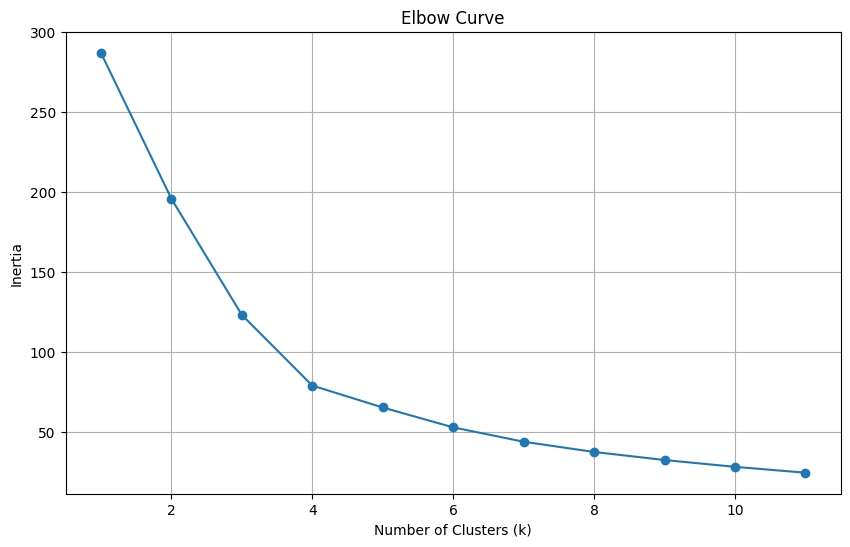

In [73]:
import matplotlib.pyplot as plt

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}
df_elbow_original = pd.DataFrame(elbow_data)

# Plot the Elbow curve using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_original['k'], df_elbow_original['Inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** Based on the inertia values and the typical shape of the Elbow curve, the best value for
𝑘
k is likely 4. This is where the inertia starts to decrease at a slower rate, indicating a balance between the number of clusters and the inertia.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [74]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=0)


In [75]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_scaled_market_data)

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:\n", kmeans.labels_)

Cluster Centers:
 [[ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]
 [ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]]
Labels:
 [0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [76]:
cluster_labels = kmeans.predict(df_scaled_market_data)

# Print the resulting array of cluster values
print("Cluster Labels:\n", cluster_labels)


Cluster Labels:
 [0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [77]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [78]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data['Cluster'] = cluster_labels

# Display sample data
df_market_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [79]:
# Create a scatter plot with hvPlot
scatter_plot = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap="tab10",
    hover_cols=["coin_id"],
    title="Cryptocurrency Price Changes by Cluster",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=800,
    height=400
)

scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [80]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [81]:
# Fit PCA on the scaled data
pca_result = pca.fit_transform(df_scaled_market_data)

# Convert the PCA result into a DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Display the first few rows of the PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [82]:
# Retrieve the explained variance to determine how much information
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio of each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {ratio:.4f}")


Explained Variance Ratio of each Principal Component:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950 (or 89.50%).

In [83]:
# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [84]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [85]:
# Create an empty list to store the inertia values
inertia_values_pca = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Specify n_init to avoid warnings
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    inertia_values_pca.append(kmeans.inertia_)
df_elbow_pca = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values_pca
})

print("Inertia values for each k:")
for k, inertia in zip(k_values, inertia_values):
    print(f"k={k}: Inertia={inertia:.4f}")

Inertia values for each k:
k=1: Inertia=287.0000
k=2: Inertia=195.8202
k=3: Inertia=123.1905
k=4: Inertia=79.0224
k=5: Inertia=65.3024
k=6: Inertia=52.8885
k=7: Inertia=43.9147
k=8: Inertia=37.5170
k=9: Inertia=32.4852
k=10: Inertia=28.2229
k=11: Inertia=24.5455


In [86]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,               # List of k-values
    'inertia': inertia_values    # Corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

print(df_elbow)


     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   52.888518
6    7   43.914690
7    8   37.517032
8    9   32.485241
9   10   28.222899
10  11   24.545513


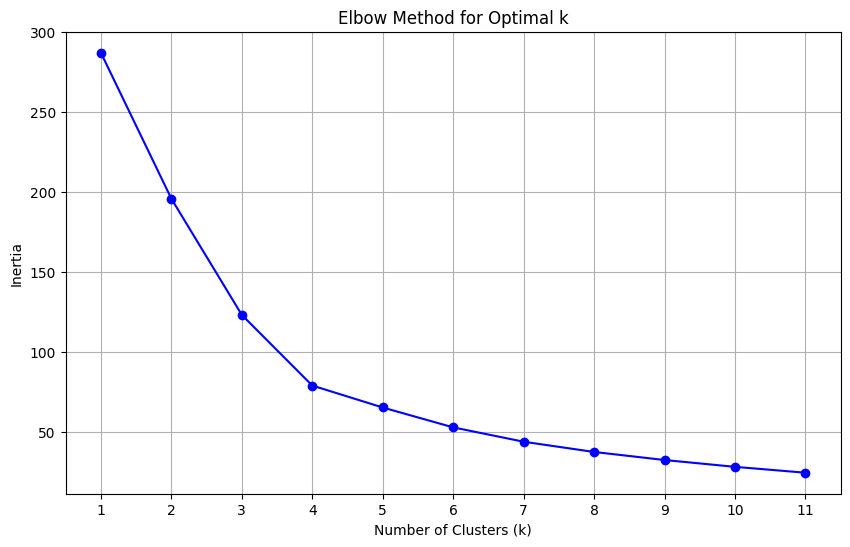

In [87]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best k value using PCA data is typically around k=4 or k=5.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Compare this with the best k value from the original data to see if there is a discrepancy.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [88]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=0)


In [89]:
# Fit the model to the PCA data
kmeans_model.fit(df_pca[['PC1', 'PC2', 'PC3']])

# Print the K-Means model object
print(kmeans_model)

KMeans(n_clusters=4, random_state=0)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
# Predict the clusters using the PCA data
cluster_labels = kmeans_model.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values
print(cluster_labels)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [91]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_labels

# Display sample data
print(df_pca_copy.head())


                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        3
ripple       -0.471835 -0.222660 -0.479053        3
bitcoin-cash -1.157800  2.041209  1.859715        0


In [92]:
# Create a scatter plot using hvPlot by setting

# Create the scatter plot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    cmap='viridis',
    hover_cols=['crypto_name'],
    width=800,
    height=400
)

scatter_plot


:Scatter   [PC1]   (PC2,cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

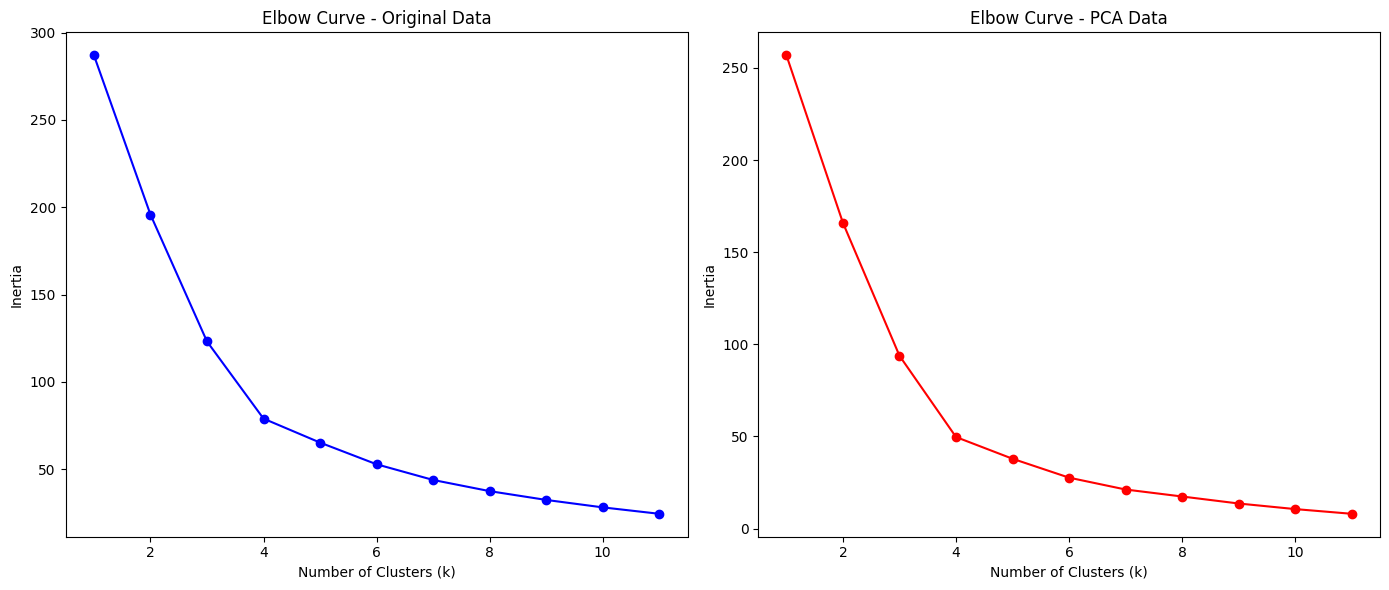

In [94]:
# Composite plot to contrast the Elbow curves

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df_elbow_original['k'], df_elbow_original['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve - Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-', color='r')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

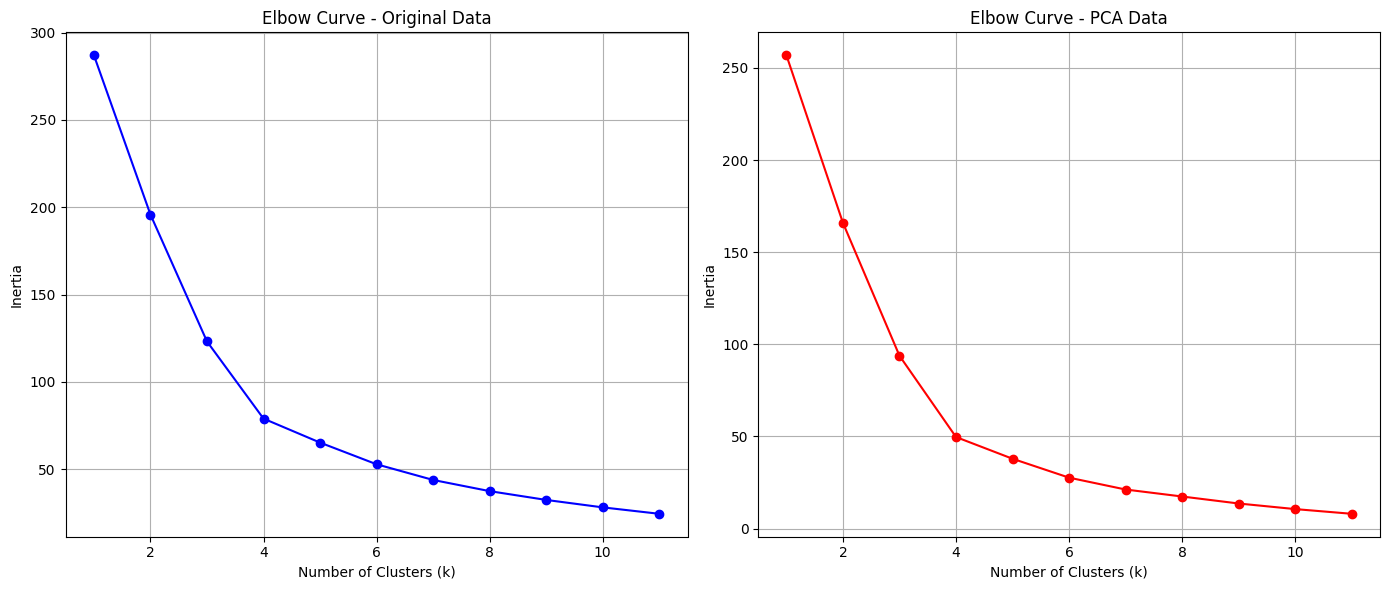

In [102]:
# Composite plot to contrast the clusters
plt.figure(figsize=(14, 6))

# Original Data Elbow Curve Plot
plt.subplot(1, 2, 1)
plt.plot(df_elbow_original['k'], df_elbow_original['Inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve - Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# PCA Data Elbow Curve Plot
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-', color='r')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features can simplify the clustering process and make visualization more accessible, but it's important to balance this with the potential loss of critical information. The choice of dimensionality should be guided by the need for computational efficiency and the importance of preserving data characteristics.